In [1]:
#import
import pandas as pd
import numpy as np

In [2]:
#df = pd.read_csv("gnb_normalize_dataset_fix.csv")
df = pd.read_csv("dataset_iklim.csv", delimiter=";", thousands=".", decimal=",")

# set column names
df.columns = ['tanggal', 'tn', 'tx', 'tavg', 'rh_avg', 'rr', 'ss', 'ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

df

,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2022,20.4,29.0,24.3,82,25.1,3.4,3,120,1,C
1,02-01-2022,20.4,28.6,24.1,82,6.4,3.0,3,150,2,SE
2,03-01-2022,20.7,29.4,24.4,80,2.9,4.1,4,150,2,SE
3,04-01-2022,20.2,28.6,24.1,81,8888.0,7.3,5,180,2,C
4,05-01-2022,19.6,28.8,24.3,78,0.8,4.1,5,150,2,S
...,...,...,...,...,...,...,...,...,...,...,...
246,04-09-2022,19.8,29.0,23.7,78,0.0,9.0,3,170,2,S
247,05-09-2022,19.4,29.3,23.8,78,16.4,5.7,5,90,2,C
248,06-09-2022,19.0,29.4,23.6,81,0.0,2.6,4,140,1,C
249,07-09-2022,19.0,28.8,24.1,83,0.0,5.2,4,200,2,S


- 8888: data tidak terukur
- 9999: Tidak Ada Data (tidak dilakukan pengukuran)
- **Tn: Temperatur minimum (°C)**
- **Tx: Temperatur maksimum (°C)**
- Tavg: Temperatur rata-rata (°C)
- **RH_avg: Kelembapan rata-rata (%)**
- RR: Curah hujan (mm)
- **ss: Lamanya penyinaran matahari (jam)**
- ff_x: Kecepatan angin maksimum (m/s)
- ddd_x: Arah angin saat kecepatan maksimum (°)
- **ff_avg: Kecepatan angin rata-rata (m/s)**
- ddd_car: Arah angin terbanyak (°)

Next... checking datatypes

In [ ]:
df = df.drop(["tanggal","tavg","rr","ff_x","ddd_x","ddd_car"], axis = 1)
df

In [ ]:
print(df.dtypes)

We have properly datatypes... let's check the rows x columns size

In [ ]:
print(df.shape)
df

let's do data pre-processing, we will drop the rows with missing values

In [3]:
df = df.dropna()

then, drop the rows with value 8888 (data tidak terukur a.k.a not measured) and 9999 (Tidak Ada Data (tidak dilakukan pengukuran) a.k.a no data), because we don't need it. 

Based on observation above, the value with 8888 and 9999 is only in the columns with column called rr (curah hujan)

In [4]:
# delete row with 8888 value
df.drop(df[df['rr'] == 8888].index, inplace=True)
df.drop(df[df['rr'] == 9999].index, inplace=True)
df

C:\Users\akuradz\AppData\Local\Temp\ipykernel_1424\62164681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['rr'] == 8888].index, inplace=True)
C:\Users\akuradz\AppData\Local\Temp\ipykernel_1424\62164681.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['rr'] == 9999].index, inplace=True)


,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-01-2022,20.4,29.0,24.3,82,25.1,3.4,3,120,1,C
1,02-01-2022,20.4,28.6,24.1,82,6.4,3.0,3,150,2,SE
2,03-01-2022,20.7,29.4,24.4,80,2.9,4.1,4,150,2,SE
4,05-01-2022,19.6,28.8,24.3,78,0.8,4.1,5,150,2,S
5,06-01-2022,19.2,29.3,23.9,76,0.0,7.4,3,130,1,C
...,...,...,...,...,...,...,...,...,...,...,...
246,04-09-2022,19.8,29.0,23.7,78,0.0,9.0,3,170,2,S
247,05-09-2022,19.4,29.3,23.8,78,16.4,5.7,5,90,2,C
248,06-09-2022,19.0,29.4,23.6,81,0.0,2.6,4,140,1,C
249,07-09-2022,19.0,28.8,24.1,83,0.0,5.2,4,200,2,S


In [5]:
# create new column with three categorical level value 0, 1, 2 based on rr value

labels = ['0', '1', '2']

df['rr_cat'] = pd.cut(df['rr'], bins=3, labels=labels)
df

# show data with rr_cat value 0
# df[df['rr_cat'] == '1']

C:\Users\akuradz\AppData\Local\Temp\ipykernel_1424\3650956891.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rr_cat'] = pd.cut(df['rr'], bins=3, labels=labels)


,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car,rr_cat
0,01-01-2022,20.4,29.0,24.3,82,25.1,3.4,3,120,1,C,0
1,02-01-2022,20.4,28.6,24.1,82,6.4,3.0,3,150,2,SE,0
2,03-01-2022,20.7,29.4,24.4,80,2.9,4.1,4,150,2,SE,0
4,05-01-2022,19.6,28.8,24.3,78,0.8,4.1,5,150,2,S,0
5,06-01-2022,19.2,29.3,23.9,76,0.0,7.4,3,130,1,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...
246,04-09-2022,19.8,29.0,23.7,78,0.0,9.0,3,170,2,S,0
247,05-09-2022,19.4,29.3,23.8,78,16.4,5.7,5,90,2,C,0
248,06-09-2022,19.0,29.4,23.6,81,0.0,2.6,4,140,1,C,0
249,07-09-2022,19.0,28.8,24.1,83,0.0,5.2,4,200,2,S,0


In [6]:
# labelling df

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_labelled = df.apply(le.fit_transform)
df_labelled.head()

,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car,rr_cat
0,0,33,24,24,20,68,23,1,10,1,0,0
1,9,33,20,22,20,40,20,1,13,2,6,0
2,17,36,28,25,18,22,30,2,13,2,6,0
4,33,25,22,24,16,7,30,3,13,2,5,0
5,42,21,27,20,14,0,63,1,11,1,0,0


In [7]:
# min max normalization sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_labelled)
df_norm = scaler.transform(df_labelled)
df_norm = pd.DataFrame(df_norm, columns=df_labelled.columns)
df_norm.head()

,tanggal,tn,tx,tavg,rh_avg,rr,ss,ff_x,ddd_x,ff_avg,ddd_car,rr_cat
0,-1.724601,0.234785,0.093654,0.329536,0.426746,1.794235,-0.980004,-1.037305,-0.003550,-1.064029,-0.798024,-0.266501
1,-1.590217,0.234785,-0.363773,0.088741,0.426746,0.740406,-1.104882,-1.037305,0.490544,0.432060,1.703890,-0.266501
2,-1.470764,0.514118,0.551082,0.449933,0.083574,0.062944,-0.688622,-0.198787,0.490544,0.432060,1.703890,-0.266501
3,-1.231858,-0.510105,-0.135059,0.329536,-0.259598,-0.501607,-0.688622,0.639732,0.490544,0.432060,1.286904,-0.266501
4,-1.097473,-0.882549,0.436725,-0.152053,-0.602770,-0.765064,0.685034,-1.037305,0.161148,-1.064029,-0.798024,-0.266501


In [ ]:
# correlation matrix
corr = df_norm.corr()
corr

# plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
# increase the size of the plot
plt.figure(figsize=(20,20))

sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap="YlGnBu",
        annot=True)

plt.show()


In [8]:
#  variabel bebas
print(df_labelled.columns)
y = df_labelled['rr_cat']
df = df_labelled.drop(["tanggal"], axis = 1)
#variabel tidak bebas
y

Index(['tanggal', 'tn', 'tx', 'tavg', 'rh_avg', 'rr', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'ddd_car', 'rr_cat'],
      dtype='object')


0      0
1      0
2      0
4      0
5      0
      ..
246    0
247    0
248    0
249    0
250    0
Name: rr_cat, Length: 232, dtype: int32

In [9]:
x = df.values

x

array([[33, 24, 24, ...,  1,  0,  0],
       [33, 20, 22, ...,  2,  6,  0],
       [36, 28, 25, ...,  2,  6,  0],
       ...,
       [19, 28, 17, ...,  1,  0,  0],
       [19, 22, 22, ...,  2,  5,  0],
       [22, 33, 16, ...,  2,  0,  0]], dtype=int64)

In [10]:
# separate the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 3)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((185, 11), (47, 11), (185,), (47,))

In [11]:
# import the model using multinomial naive bayes

from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()

# train the model
gnb.fit(x_train, y_train)

# predict the model
y_pred = gnb.predict(x_test)

# import the metrics
from sklearn import metrics

# print the accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8723404255319149


In [12]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0])

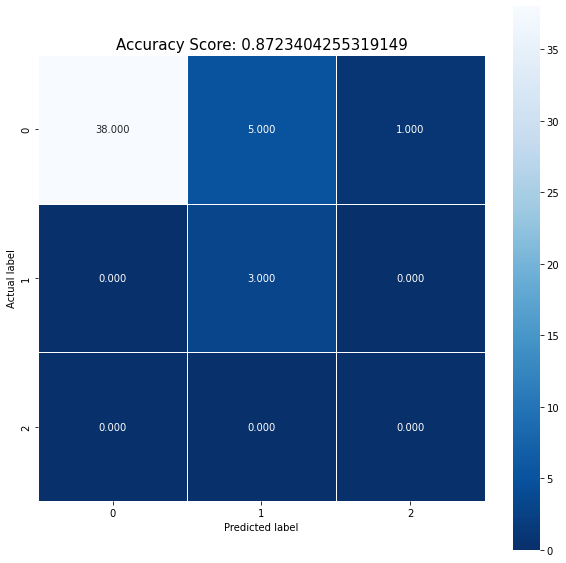

In [15]:
# plot naive bayes confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

plt.show()


In [ ]:
# show the y_test based on separation dataset
# np.array(y_test)

# show the confusion matrix based on the prediction result 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

#evaluate performance from the confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

# this value will show all probability for each predicted class 
y_pred.predict_proba(x_test)